In [ ]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
from math import isnan
import operator
!pip install --upgrade plotly
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
print('new')

import warnings
warnings.filterwarnings('ignore')

new


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_movies = pd.read_csv("/content/drive/MyDrive/ML/IMDb movies.csv")
df_movies=df_movies.drop(['country','original_title','imdb_title_id','date_published','description','budget','usa_gross_income','worlwide_gross_income','metascore','writer','production_company','actors','director'],axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Outlier

In [ ]:
for i in range(len(df_movies['year'])):
  if(type(df_movies['year'][i])==type('abc')):
    try:
      x=int(df_movies['year'][i])
      df_movies['year'][i]=x

    except ValueError:
      df_movies['year'][i]=None
      print("Cannot convert to string")
  
# outlier detection
for i in range(100):
  if(df_movies['year'][i] < 1960 and ((df_movies['language'][i]=='None') or pd.isna(df_movies['language'][i]))):
    df_movies['language'][i] = 'Silent'

df_movies=df_movies.dropna(how='any',axis=0) 


Cannot convert to string


## Bucketization to convert numerical features

In [ ]:
#bucketisation
from copy import deepcopy
for i in df_movies:
  temp = deepcopy(list(df_movies[i]))
  can = 1
  for j in temp:
    if(type(j) == type('sa')): can = 0

  if(not can):
    continue

  mx = -1e9
  mn = 1e9
  for j in temp:
    mx = max(mx,j)
    mn = min(mn,j)
  
  diff = (mx - mn)//5

  for j in range(len(temp)):
    if(temp[j] < mn + diff): temp[j] = i + "0"
    elif(temp[j] < mn + 2*diff): temp[j] = i + "1"
    elif(temp[j] < mn + 3*diff): temp[j] = i + '2'
    elif(temp[j] < mn + 4*diff): temp[j] = i + '3'
    else: temp[j] = i + "4"

  df_movies[i] = temp 

df_movies

,title,year,genre,duration,language,avg_vote,votes,reviews_from_users,reviews_from_critics
0,Miss Jerry,year0,Romance,duration0,Silent,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0
1,The Story of the Kelly Gang,year0,"Biography, Crime, Drama",duration0,Silent,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0
2,Den sorte drøm,year0,Drama,duration0,Silent,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0
3,Cleopatra,year0,"Drama, History",duration0,English,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0
4,L'Inferno,year0,"Adventure, Drama, Fantasy",duration0,Italian,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0
...,...,...,...,...,...,...,...,...,...
85842,Lupin III: La menzogna di Fujiko Mine,year4,"Animation, Adventure, Crime",duration0,Japanese,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0
85843,Kaithi,year4,"Action, Thriller",duration0,Tamil,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0
85846,Enemy Lines,year4,War,duration0,"English, Polish, Russian, German",avg_vote4,votes0,reviews_from_users0,reviews_from_critics0
85849,Manoharam,year4,"Comedy, Drama",duration0,Malayalam,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0


## Bag of words implementation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cols = ['genre']
dfs=[]


for col in cols:

  # print(temp)
  df_movies[col] = df_movies[col].apply(lambda x: x.split(','))
  df_movies[col] = df_movies[col].apply(lambda x: " ".join(x))
  
  vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(df_movies[col])
  col_names=vectorizer.get_feature_names()

  for j in range(len(col_names)):
    col_names[j]=col+col_names[j]

  dfs.append(pd.DataFrame(X.toarray(),columns=col_names))
  df_movies=df_movies.drop(col,axis=1)

df_movies.head()

,title,year,duration,language,avg_vote,votes,reviews_from_users,reviews_from_critics
0,Miss Jerry,year0,duration0,Silent,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0
1,The Story of the Kelly Gang,year0,duration0,Silent,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0
2,Den sorte drøm,year0,duration0,Silent,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0
3,Cleopatra,year0,duration0,English,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0
4,L'Inferno,year0,duration0,Italian,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0


In [ ]:
import pickle
import os

In [ ]:
dfs[0].reset_index(drop=True, inplace=True)
df_movies.reset_index(drop=True, inplace=True)

In [ ]:
df_movies=pd.concat([df_movies,dfs[0]],axis=1)

In [ ]:
df_movies

,title,year,duration,language,avg_vote,votes,reviews_from_users,reviews_from_critics,genreaction,genreadult,genreadventure,genreanimation,genrebiography,genrecomedy,genrecrime,genredocumentary,genredrama,genrefamily,genrefantasy,genrefi,genrefilm,genrehistory,genrehorror,genremusic,genremusical,genremystery,genrenews,genrenoir,genrereality,genreromance,genresci,genresport,genrethriller,genretv,genrewar,genrewestern
0,Miss Jerry,year0,duration0,Silent,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,The Story of the Kelly Gang,year0,duration0,Silent,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Den sorte drøm,year0,duration0,Silent,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Cleopatra,year0,duration0,English,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,L'Inferno,year0,duration0,Italian,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69311,Lupin III: La menzogna di Fujiko Mine,year4,duration0,Japanese,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69312,Kaithi,year4,duration0,Tamil,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
69313,Enemy Lines,year4,duration0,"English, Polish, Russian, German",avg_vote4,votes0,reviews_from_users0,reviews_from_critics0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
69314,Manoharam,year4,duration0,Malayalam,avg_vote4,votes0,reviews_from_users0,reviews_from_critics0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## One hot encoding

In [ ]:
#one hot encoding
movies = []
for i in df_movies:
  if(i == 'genre' or i == 'country' or i=='title'): continue;
  temp = deepcopy(list(df_movies[i]))
  if(len(set(temp)) == 2):
    curr = list(set(temp))
    for j in range(len(temp)):
      if(temp[j] == curr[0]): temp[j] = 0
      else: temp[j] = 1
    df_movies[i] = temp
    continue

  one_hot = pd.get_dummies(df_movies[i])
  df_movies = df_movies.drop(i,axis = 1)
  movies.append(one_hot)
  

df_movies.head()

,title,genreaction,genreadult,genreadventure,genreanimation,genrebiography,genrecomedy,genrecrime,genredocumentary,genredrama,genrefamily,genrefantasy,genrefi,genrefilm,genrehistory,genrehorror,genremusic,genremusical,genremystery,genrenews,genrenoir,genrereality,genreromance,genresci,genresport,genrethriller,genretv,genrewar,genrewestern
0,Miss Jerry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,The Story of the Kelly Gang,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Den sorte drøm,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Cleopatra,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,L'Inferno,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_movies = pd.concat(movies + [df_movies], axis = 1)

In [ ]:
# filename = "df_movies_final"
# with open(filename,'wb+') as file:
#     pickle.dump(df_movies,file)

In [ ]:
df_movies.head()

,year0,year1,year2,year3,year4,duration0,duration1,duration2,duration3,duration4,Aboriginal,"Aboriginal, English","Aboriginal, Japanese, Hokkien","Aboriginal, Portuguese",Afrikaans,"Afrikaans, English","Afrikaans, English, Dutch","Afrikaans, English, Portuguese","Afrikaans, English, Ungwatsi","Afrikaans, English, Xhosa","Afrikaans, English, Zulu","Afrikaans, Mandarin, Xhosa, French, English","Afrikaans, Spanish, English, German","Afrikaans, Xhosa, English","Afrikaans, Zulu, English","Akan, English",Albanian,"Albanian, English, Italian","Albanian, French","Albanian, German","Albanian, German, Greek, English, French","Albanian, German, Serbian, English","Albanian, Italian","Albanian, Macedonian, Bulgarian, Croatian, Russian, Italian","Algonquin, French, English",American Sign Language,"American Sign Language, English","American Sign Language, English, Spanish",Amharic,"Amharic, English, German",...,votes4,reviews_from_users0,reviews_from_users1,reviews_from_users2,reviews_from_users3,reviews_from_users4,reviews_from_critics0,reviews_from_critics1,reviews_from_critics2,reviews_from_critics3,reviews_from_critics4,title,genreaction,genreadult,genreadventure,genreanimation,genrebiography,genrecomedy,genrecrime,genredocumentary,genredrama,genrefamily,genrefantasy,genrefi,genrefilm,genrehistory,genrehorror,genremusic,genremusical,genremystery,genrenews,genrenoir,genrereality,genreromance,genresci,genresport,genrethriller,genretv,genrewar,genrewestern
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,Miss Jerry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,The Story of the Kelly Gang,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,Den sorte drøm,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,Cleopatra,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,L'Inferno,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
title=df_movies['title']
df_movies=df_movies.drop('title',axis=1)

## Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
variance_sum=[]
dimensions=[]
for i in range(3,30):
    pca = PCA(n_components=i)
    pca.fit(df_movies)
    variance_sum.append(np.sum(pca.explained_variance_ratio_))
    dimensions.append(i)
    
    print("Sum of variance is "+str(variance_sum[-1])+" on "+str(i)+" dimensions. ")

    if(100*variance_sum[-1]>90):
        break

Sum of variance is 0.30549765681729896 on 3 dimensions. 


KeyboardInterrupt: ignored

In [ ]:
plt.xlabel("Dimenions")
plt.ylabel("Variance")
plt.title("Variance vs Dimensions")
plt.plot(dimensions,variance_sum)
plt.show()

In [ ]:
pca= PCA(n_components=20)
df_transformed=pca.fit_transform(df_movies)

print("Sum of variance : "+str(np.sum(pca.explained_variance_ratio_)))
print(pca.explained_variance_ratio_)

Sum of variance : 0.7913061202148453
[0.11574806 0.10547104 0.08427856 0.0686682  0.053631   0.04561321
 0.04290258 0.03926617 0.03626513 0.02760912 0.02542618 0.02305064
 0.02039321 0.01969595 0.01779705 0.01645096 0.01326464 0.01270982
 0.01235948 0.01070512]


In [ ]:
from sklearn.cluster import KMeans
k_values=[]
loss_values=[]

for i in range(2,50):
  print(i)
  kmeans = KMeans(init="random", n_clusters=i, n_init=10, max_iter=300)
  kmeans.fit(df_transformed)
  loss_values.append(kmeans.inertia_)
  k_values.append(i)

In [ ]:
plt.xlabel("Different values of k")
plt.ylabel("Avg Loss")

plt.plot(k_values[:30],loss_values[:30])


# Unsupervised Learning for prediction

In [ ]:
kmeans = KMeans(init="random", n_clusters=9, n_init=10, max_iter=300)
kmean_data=kmeans.fit_transform(df_transformed)


In [ ]:
kmean_labels=kmeans.labels_

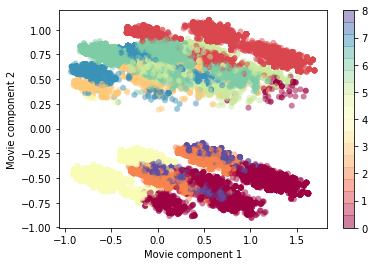

In [ ]:
pca = PCA(2) 
kmean_projected = pca.fit_transform(df_transformed)

plt.scatter(kmean_projected[:, 0],kmean_projected[:, 1],
            c=kmean_labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 18))
plt.xlabel('Movie component 1')
plt.ylabel('Movie component 2')
plt.colorbar()

In [ ]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
from scipy.spatial import distance

In [ ]:
movie_input=[]
for i in range(2):
  movie_input.append(random.randint(0,len(kmean_data)))
  print(title[movie_input[-1]])
  


La montagna
Dominion


In [ ]:
#kmean_data -> 9 dimensional represenation
#kmeans_labels -> no. of cluster of a point
#title -> movie names
#movie_input-> index
movie_input

[7938, 56004]

In [ ]:
title

0                                   Miss Jerry
1                  The Story of the Kelly Gang
2                               Den sorte drøm
3                                    Cleopatra
4                                    L'Inferno
                         ...                  
69311    Lupin III: La menzogna di Fujiko Mine
69312                                   Kaithi
69313                              Enemy Lines
69314                                Manoharam
69315           De Beentjes van Sint-Hildegard
Name: title, Length: 69316, dtype: object

In [ ]:
center=kmeans.cluster_centers_
center_transform = kmeans.transform(center)

In [ ]:
center.shape

(9, 9)

In [ ]:
from scipy.spatial import distance
def similarity_distance(metric_name, point_1, point_2):
  return distance.euclidean(point_1, point_2)
  

In [ ]:
#kmean_data -> 9 dimensional represenation
#kmeans_labels -> no. of cluster of a point
#title -> movie names
#movie_input-> index

In [ ]:
# kmean_data[kmean_labels == 2]

array([[2.54219575, 2.33978798, 1.9707492 , ..., 2.04427528, 2.28849606,
        2.27362695],
       [2.3740473 , 2.09389844, 2.01509035, ..., 2.34851662, 2.38378762,
        2.38152656],
       [2.55605327, 2.3743615 , 2.08482846, ..., 2.19248404, 2.41675875,
        2.35195215],
       ...,
       [2.20588215, 2.40209112, 1.51969551, ..., 2.13949744, 2.32038796,
        1.82751223],
       [1.87762047, 2.23332568, 1.05503743, ..., 1.99417881, 2.27641456,
        1.7214505 ],
       [1.62105873, 1.91833489, 0.87593152, ..., 1.60922259, 1.82403554,
        1.1659096 ]])

In [ ]:
cluster_to_movie = {}
for i in range(len(kmean_labels)):
  if(kmean_labels[i] not in cluster_to_movie): cluster_to_movie[kmean_labels[i]] = [i]
  else: cluster_to_movie[kmean_labels[i]].append(i)

print(cluster_to_movie[0])

[941, 1129, 1135, 1593, 1641, 1808, 1812, 1914, 1927, 1975, 2236, 2286, 2315, 2787, 2883, 2922, 3022, 3082, 3119, 3272, 3329, 3697, 3718, 3762, 3946, 3983, 4112, 4309, 4671, 4700, 4721, 6113, 6953, 7437, 7887, 7918, 7950, 8097, 8122, 8147, 8162, 8196, 8272, 8382, 8428, 8429, 8439, 8488, 8532, 8547, 8552, 8705, 8732, 8841, 8857, 8929, 8943, 9097, 9446, 9469, 9554, 9583, 9641, 9760, 9845, 9887, 9936, 10132, 10547, 10887, 10891, 11126, 11231, 11257, 11275, 11405, 11483, 11506, 11580, 11892, 11937, 12060, 12299, 12929, 15546, 16584, 23683, 23761, 23773, 23804, 23827, 23848, 23862, 23886, 23895, 23903, 23934, 23950, 23961, 24012, 24105, 24157, 24256, 24276, 24279, 24310, 24314, 24318, 24326, 24339, 24347, 24350, 24353, 24359, 24366, 24373, 24375, 24385, 24396, 24401, 24408, 24415, 24425, 24426, 24430, 24432, 24437, 24438, 24439, 24441, 24442, 24449, 24452, 24453, 24455, 24457, 24458, 24461, 24464, 24469, 24481, 24485, 24486, 24489, 24491, 24492, 24493, 24495, 24497, 24504, 24505, 24511, 245

In [ ]:
kmeans.predict([center[4]])

array([4], dtype=int32)

# Custom defined similarity Score

In [ ]:
def find_similarity(a,b):
  # print(a,b)
  mx = 4
  return (mx - a) * (mx - b)

In [ ]:
def find_cluster(movie_input):
  centre_cluster = []
  for i in range(len(center)):
    centre_cluster.append(kmeans.predict([center[i]])[0])
  
  temp = []
  for i in range(len(center)):
    dist_a = similarity_distance('euclidean', kmean_data[movie_input[0]],center_transform[i])
    dist_b = similarity_distance('euclidean', kmean_data[movie_input[1]],center_transform[i])
    temp.append([find_similarity(dist_a,dist_b),centre_cluster[i]])
  
  temp = sorted(temp)[::-1]
  return temp[0][1]


In [ ]:
def find_movies(movie_input):
  cluster1 = kmean_labels[movie_input[0]]
  cluster2 = kmean_labels[movie_input[1]]

  if(cluster1 == cluster2): cluster = cluster1
  else: cluster = find_cluster(movie_input)
  
  movies = cluster_to_movie[cluster]
  temp = []
  for i in range(len(movies)):
    if(movies[i] in movie_input): continue
    dist_a = similarity_distance('euclidean', kmean_data[movie_input[0]],kmean_data[movies[i]])
    dist_b = similarity_distance('euclidean', kmean_data[movie_input[1]],kmean_data[movies[i]])
    temp.append([find_similarity(dist_a,dist_b),movies[i]])
  
  temp = sorted(temp)[::-1]
  recom_movie = []
  recom_index = []
  for i in range(5): 
    recom_movie.append(title[temp[i][1]])
    recom_index.append(temp[i][1])
  return recom_movie, recom_index

In [ ]:
movie = [33184,60403]
for i in movie: print(title[i])
# 
find_movies(movie)

Spider
Avengers: Endgame


(['Knives and Skin',
  'Inheritance',
  'Notes on an Appearance',
  'Long Lost',
  'The System'],
 [67947, 67556, 66719, 66677, 66598])

In [ ]:
from random import randint
def output():
  movie = [randint(0,len(title)), randint(0,len(title))]
  recom, recom_index = find_movies(movie)

  temp = {}
  temp['movie1'] = [title[movie[0]]]
  temp['movie2'] = [title[movie[1]]]

  for i in range(5):
    temp['recomendation - ' + str(i + 1)] = [recom[i]]
    dist_a = similarity_distance('euclidean', kmean_data[movie_input[0]],kmean_data[recom_index[i]])
    dist_b = similarity_distance('euclidean', kmean_data[movie_input[1]],kmean_data[recom_index[i]])
    print(dist_a,dist_b)
    temp['similarity metric value ' + str(i + 1)] = [find_similarity(dist_a,dist_b)]

  return pd.DataFrame.from_dict(temp)

# Final Predictions

In [ ]:
temp = output()
temp.T

0.47939228119926625 2.55742807919049
0.47939228119926625 2.55742807919049
0.47939228119926625 2.55742807919049
0.4737639766089861 2.6302547556878597
0.4737639766089861 2.6302547556878597


,0
movie1,Avvocato di me stesso
movie2,Mente omicida
recomendation - 1,L'anniversario
similarity metric value 1,5.07873
recomendation - 2,Un attico sopra l'inferno
similarity metric value 2,5.07873
recomendation - 3,Cul de sac
similarity metric value 3,5.07873
recomendation - 4,Rancho bravo
similarity metric value 4,4.83005


In [ ]:
temp = output()
temp.T

1.8642617205723702 2.132961263131998
1.8642617205723702 2.132961263131998
1.846348588901398 2.239877938790849
1.8809157590716452 2.2496039321027244
1.8809157590716452 2.2496039321027244


,0
movie1,Des plumes dans la tête
movie2,FrightWorld
recomendation - 1,Dragons of Camelot
similarity metric value 1,3.98751
recomendation - 2,Apocalypse and the Beauty Queen
similarity metric value 2,3.98751
recomendation - 3,Iconoclast
similarity metric value 3,3.79069
recomendation - 4,Beverly Hills Christmas
similarity metric value 4,3.70924


In [ ]:
temp = output()
temp.T


0.5143041719396348 2.7842947583417934
0.5143041719396348 2.7842947583417934
0.5143041719396348 2.7842947583417934
0.4935738390770831 2.814391117668326
0.48783109394368557 2.8275372874085116


,0
movie1,Operazione Crossbow
movie2,Kape neuwareu
recomendation - 1,Peppermint Frappé
similarity metric value 1,4.23758
recomendation - 2,La caccia
similarity metric value 2,4.23758
recomendation - 3,Rosa blanca
similarity metric value 3,4.23758
recomendation - 4,I cinque del bunker
similarity metric value 4,4.15725


In [ ]:
temp = output()
temp.T


2.2207404118820295 3.2767165895303823
2.2207404118820295 3.2767165895303823
2.2207404118820295 3.2767165895303823
2.2526950942314388 3.321627375926725
2.14271665575725 3.229523120126722


,0
movie1,Kolonya Cumhuriyeti
movie2,Obce niebo
recomendation - 1,Hikkoshi daimyô!
similarity metric value 1,1.28691
recomendation - 2,Neko zamurai
similarity metric value 2,1.28691
recomendation - 3,Kiyosu kaigi
similarity metric value 3,1.28691
recomendation - 4,Zohi Sdom
similarity metric value 4,1.18532


In [ ]:
temp = output()
temp.T

2.1247751623678224 1.1603142356820229
2.1247751623678224 1.1603142356820229
2.1247751623678224 1.1603142356820229
2.2048018606314077 1.0886426941572411
2.2048018606314077 1.0886426941572411


,0
movie1,La montaña rusa
movie2,The Other Side
recomendation - 1,The Second Coming of Christ
similarity metric value 1,5.32505
recomendation - 2,Lay It Down
similarity metric value 2,5.32505
recomendation - 3,Karate Kid 4
similarity metric value 3,5.32505
recomendation - 4,Muse
similarity metric value 4,5.22646


In [ ]:
temp[4]

,movie1,movie2,recomendation - 0,recomendation - 1,recomendation - 2,recomendation - 3,recomendation - 4,our measure
0,Flesh and Bullets,Song of Hiawatha,Easy Rider: The Ride Back,The Other Side of the Mirror,Glitter,Ashes of Eden,Machine,994297.927475


In [ ]:
for i in range(len(title)):
  if('Avenger' in title[i] or 'Spider' in title[i] or 'batman' in title[i]): print(i, title[i])

3622 The Spider Returns
4591 The Spider
4836 The Spider Woman Strikes Back
8617 Invisible Avenger
10751 Spider baby
16174 Kingdom of the Spiders
19740 The Toxic Avenger - Il vendicatore tossico
21775 Lady Avenger
22009 The Toxic Avenger Part III: The Last Temptation of Toxie
22010 The Toxic Avenger Part II
22615 Alien Space Avenger
26438 The Avengers - Agenti speciali
28465 Spider-Man
30674 Spiders
30987 Citizen Toxie: The Toxic Avenger IV
31834 Eyes of the Spider
33184 Spider
33318 Spiders II: Breeding Ground
34666 Spider's Web - La tela del ragno
34667 Spider-Man 2
37790 Spider-Man 3
37895 Spiderwick - Le cronache
42112 The Avengers
42899 The Amazing Spider-Man
46262 Samurai Avenger: The Blind Wolf
48498 Spiderhole
49953 Spiders 3D
51458 Big Ass Spider!
51800 The Amazing Spider-Man 2 - Il potere di Electro
54067 Spider-Man: Homecoming
55091 Avengers: Age of Ultron
55641 Captain Morten and the Spider Queen
56213 The Giant Spider
60402 Avengers: Infinity War
60403 Avengers: Endgame
614